In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def read_signals():
    
    data = [signal.rstrip('\n') for signal in open('../Data.txt')]
    signals = []

    for signal in data:
        signals.append(float(signal))
    
    return signals

In [22]:
def rectify(raw_signals):
    
    recitifed_signals = []
    
    for signal in raw_signals:
        
        recitifed_signals.append(np.absolute(signal))
        
    return recitifed_signals

In [23]:
def set_threshold(rectified_signals):
    
    threshold = 3 * np.std(rectified_signals[0:125])
    return threshold
    

In [24]:
def moving_average(signals, threshold, window_size: int=20):
    
    templates = []
    detected_peaks =[]
    detected_peaks_index = []
    signal_index = window_size
    
    while(signal_index<len(signals)):
        
        samples = signals[signal_index -window_size-signal_index]                                 
        averaged_samples = np.average(samples)
          
        if(averaged_samples > threshold):

            detected_peaks_index.append(signal_index)
            detected_peaks.append(averaged_samples)
                
            new_signal_index = signal_index + window_size +1

            if(signals[new_signal_index] > threshold):
                new_signal_index+=1
                    
                while(signals[new_signal_index] > threshold):
                    new_signal_index+=1
                    
                signal_index = new_signal_index
                
            else:
                signal_index+=1
        else:
            signal_index+=1
                    
    return detected_peaks, detected_peaks_index

In [25]:
def MU_to_MUAP(samples, templates, DiffTh):
    
    if(len(templates) == 0):
        
        new_template = samples
        templates.append(new_template)
        
    else:
        for template in templates:
            difference = sum([(sampleM - sampleK)**2, for sampleM, sampleK in zip(samples, template)])
            
            if(difference< DiffTh):
                
                template = difference = sum([(sampleM - sampleK)**2, for sampleM, sampleK in zip(samples, template)])

In [30]:
def decompose_EMG(signals, window_size: int=20):
    
    xaxis = np.arange(0,500)
    rectified_signals = rectify(signals)
    threshold = set_threshold(rectified_signals)
    indices, sigs = moving_average(rectified_signals, threshold)
    figure, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.grid()
    ax.plot(xaxis, rectified_signals[0:500], color='red')
    ax.title.set_text('Before Noise Filtering')
    print(threshold)
    

11.210159045074084


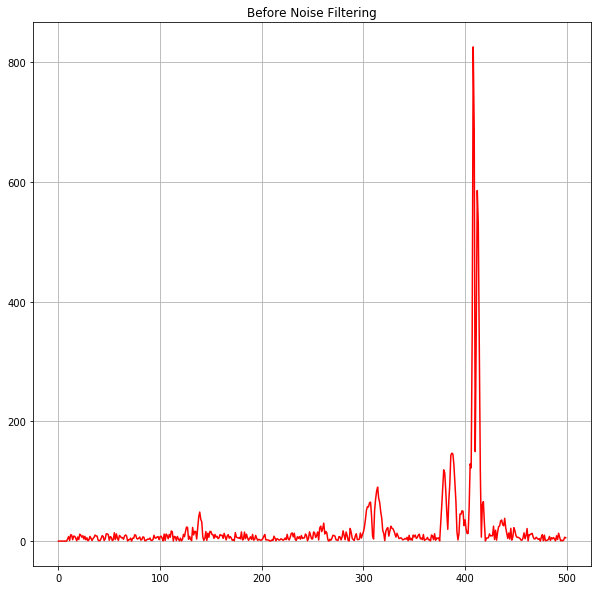

In [31]:
DiffTh = 12.65 ** 5
signals = read_signals()
decompose_EMG(signals)